In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import pickle 
import regex as re
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)


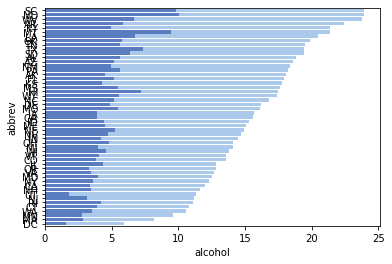

In [6]:
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

In [4]:
limited_data= pickle.load(open( "/Users/dinakats/Desktop/SPICED/final_proj_git_renew/Genetics-to-Therapuetics/limited_data_0624.pickle", "rb" ))

In [5]:
limited_data

,LINC02082,AC090241.2,RAB4B,ENSG00000273842,TIGAR,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,CYP4F2,AL590824.1,AC010525.1,AC097724.1,PPP6R1,AL031666.1,ENSG00000280861,BATF3,standard_drugs,vital_status
0,0.000000,1.535474,1.432444,0.0,3.042826,13.129536,0.0,0.013725,143.973173,0.106523,...,0.000000,0.0,0.000000,0.032132,13.336782,0.287535,0.0,0.191725,sorafenib,dead
1,0.049100,0.112411,3.236406,0.0,2.588924,12.977443,0.0,0.017477,102.836528,0.226077,...,3.666961,0.0,0.000000,0.081834,12.288496,0.337241,0.0,0.507561,sorafenib,dead
2,0.022254,0.074107,1.745773,0.0,2.043631,6.803041,0.0,0.014786,74.978455,0.184439,...,25.374941,0.0,0.035828,0.037090,8.028534,0.148482,0.0,0.244604,oncophage vaccine,dead
3,0.029526,0.000000,7.044585,0.0,3.217665,8.207564,0.0,0.009809,358.025155,0.163139,...,0.226847,0.0,0.095072,0.000000,5.626958,0.162237,0.0,3.121710,oncophage vaccine,dead
4,0.759959,0.143791,1.059033,0.0,2.141863,27.879860,0.0,1.682061,110.210481,0.000000,...,0.546409,0.0,2.224577,0.000000,9.560019,0.271155,0.0,1.084819,interferon-alpha,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.000000,0.210632,2.128816,0.0,7.407418,13.665131,0.0,0.005377,39.174198,0.125188,...,0.000000,0.0,0.000000,0.037762,13.388848,0.489091,0.0,0.088942,ptk-zk,dead
606,0.356159,0.004942,3.551915,0.0,1.020527,27.355877,0.0,0.092968,76.649951,0.098394,...,1.939607,0.0,0.688090,0.237440,14.124484,0.055914,0.0,0.643135,gemcitabine,dead
607,0.356159,0.004942,3.551915,0.0,1.020527,27.355877,0.0,0.092968,76.649951,0.098394,...,1.939607,0.0,0.688090,0.237440,14.124484,0.055914,0.0,0.643135,avastin,dead
608,0.356159,0.004942,3.551915,0.0,1.020527,27.355877,0.0,0.092968,76.649951,0.098394,...,1.939607,0.0,0.688090,0.237440,14.124484,0.055914,0.0,0.643135,il-2,dead


In [10]:
limited_data[limited_data.standard_drugs == 'gemcitabine']

,LINC02082,AC090241.2,RAB4B,ENSG00000273842,TIGAR,RNF44,NUP210P2,DNAH3,RPL23A,EHD4-AS1,...,CYP4F2,AL590824.1,AC010525.1,AC097724.1,PPP6R1,AL031666.1,ENSG00000280861,BATF3,standard_drugs,vital_status
6,0.023698,0.003288,2.149666,0.258854,3.389593,5.223044,0.000000,0.004499,125.321490,0.021823,...,0.000000,0.000000,0.076306,0.000000,14.921367,0.260428,0.0,5.873116,gemcitabine,alive
17,0.000000,0.004399,2.835796,0.000000,2.993275,6.673202,0.000000,0.012037,156.782804,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.612161,0.012443,0.0,1.402154,gemcitabine,dead
28,0.000000,0.019033,1.469383,0.000000,1.945866,4.047016,0.000000,0.007812,148.919693,0.000000,...,0.012398,0.000000,0.000000,0.000000,7.349737,0.893683,0.0,2.204107,gemcitabine,alive
29,0.000000,0.000000,2.107524,0.000000,1.650426,5.541257,0.000000,0.010875,112.545672,0.023446,...,0.000000,0.000000,0.000000,0.084868,9.254038,0.539611,0.0,1.925632,gemcitabine,alive
35,0.171723,0.000000,1.681151,0.000000,2.725282,7.967171,0.000000,0.006986,93.539464,0.090364,...,0.027717,0.000000,0.039496,0.081773,11.337453,0.057770,0.0,2.234179,gemcitabine,dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0.000000,0.000000,6.163421,0.000000,4.361232,1.767078,0.000000,0.007597,704.516123,0.073706,...,0.030144,0.000000,0.000000,0.222330,4.227037,0.680633,0.0,0.649339,gemcitabine,dead
585,0.000000,0.000000,1.824378,0.000000,3.646083,3.991230,0.000000,0.012169,81.975005,0.021465,...,0.000000,0.000000,0.037528,0.000000,7.411296,0.384239,0.0,2.440061,gemcitabine,alive
589,0.041985,0.002913,3.452633,0.000000,2.080632,5.848616,0.000000,0.019926,146.449539,0.096658,...,0.000000,0.000000,0.000000,0.000000,17.902303,0.049435,0.0,1.444864,gemcitabine,dead
601,0.030094,0.008351,3.283386,0.000000,4.219570,4.431836,0.075767,0.027137,167.678062,0.000000,...,0.013601,0.031677,0.290700,0.000000,17.348257,0.047245,0.0,1.968893,gemcitabine,alive
